In [6]:
import numpy as np
import pandas as pd

In [16]:
class Evaluation:
    def __init__(self, grandtruth_path, holoclean_path, initial_path):
        """
        This class implements all performance evaluation with output of the data
        :param grandtruth_path: list of data for the true data
        :param holoclean_path: the output of the holoclean
        :param initial_path: path to initial data
        """
        self.holo_path = holoclean_path
        self.gt_df = pd.read_csv(grandtruth_path)
        self.holo_df = pd.read_csv(holoclean_path)
        self.init_df = pd.read_csv(initial_path)

    def tuple_type(self):

        self.error_cells = self.init_df[~self.init_df.isin(self.gt_df).all(1)]
        self.correct_cells = self.init_df[self.init_df.isin(self.gt_df).all(1)]
        self.true_positive_alg = pd.merge(self.holo_df, self.gt_df, how='inner', on=['ind', 'attr', 'val'])
        
        self.false_positive = self.holo_df.shape[0] - self.true_positive_alg.shape[0]
        self.tmp1 = pd.merge(self.true_positive_alg, self.correct_cells, how='inner', on=['ind', 'attr', 'val'])
        self.false_negative = self.correct_cells.shape[0] - self.tmp1.shape[0]
        #self.tmp1 = pd.merge(self.true_positive_alg, self.correct_cells, how='inner', on=['ind', 'attr', 'val'])
        #self.false_negative = self.correct_cells.shape[0] - self.tmp1.shape[0]

        fixed_cells = self.init_df.shape[0]-self.holo_df.shape[0]
        
        prec = float(self.true_positive_alg.shape[0] + fixed_cells) / (
                fixed_cells + self.true_positive_alg.shape[0] +
                self.false_positive)

        recall = float(self.true_positive_alg.shape[0] + fixed_cells) / (
                fixed_cells + self.true_positive_alg.shape[0] +
                self.false_negative)
        
        #prec = float(self.true_positive_alg.shape[0] ) / (
                 #self.true_positive_alg.shape[0] +
                #self.false_positive)

        #recall = float(self.true_positive_alg.shape[0] ) / (
                 #self.true_positive_alg.shape[0] +
                #self.false_negative)
        
        print( "evaluating the output from: ", self.holo_path )
        print( "The precision is : " , str(prec))
        print( "The recall is : " , str(recall))
        print( "The F1 is : " , str(2 * float(prec * recall) / (prec + recall)))
        print( "-------------------------------------")


In [17]:

eval1 = Evaluation('groundtruth.csv', 'holoclean-output.csv', 'input_data.csv') # input_data is flattened
eval1.tuple_type()

eval2 = Evaluation('groundtruth.csv', 'holoclean-output-ideal-error-detection.csv', 'input_data.csv')
eval2.tuple_type()



evaluating the output from:  holoclean-output.csv
The precision is :  0.2711578947368421
The recall is :  0.4238236261928266
The F1 is :  0.33072281422518934
-------------------------------------
evaluating the output from:  holoclean-output-ideal-error-detection.csv
The precision is :  0.8435789473684211
The recall is :  1.0
The F1 is :  0.9151535914125843
-------------------------------------


In [18]:
thresholds=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  

In [19]:
result_path = 'holoclean-hosp/deepdive-results/'

for t in thresholds:    
    result=result_path+'deepdive_result_'+str(t)+'_pruning.csv'
    print(t)
    eval_t = Evaluation('groundtruth.csv', result, 'input_data.csv') 
    eval_t.tuple_type()   
    

0.0
evaluating the output from:  holoclean-hosp/deepdive-results/deepdive_result_0.0_pruning.csv
The precision is :  0.9711578947368421
The recall is :  0.5007055248019103
The F1 is :  0.6607462579674854
-------------------------------------
0.1
evaluating the output from:  holoclean-hosp/deepdive-results/deepdive_result_0.1_pruning.csv
The precision is :  0.981
The recall is :  0.5032263290045628
The F1 is :  0.6652152964899445
-------------------------------------
0.2
evaluating the output from:  holoclean-hosp/deepdive-results/deepdive_result_0.2_pruning.csv
The precision is :  0.9815263157894737
The recall is :  0.5033604145860887
The F1 is :  0.6654534425235062
-------------------------------------
0.3
evaluating the output from:  holoclean-hosp/deepdive-results/deepdive_result_0.3_pruning.csv
The precision is :  0.9829473684210527
The recall is :  0.5037220843672456
The F1 is :  0.6660960125543904
-------------------------------------
0.4
evaluating the output from:  holoclean-ho

In [11]:
#todo: create series and plot
%matplotlib inline
import matplotlib.pyplot as plt

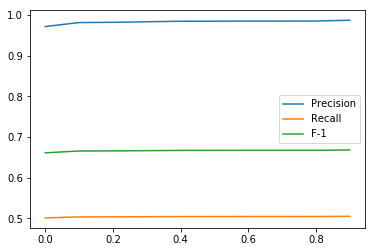

In [12]:
precision = pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
          data=[
              0.9711578947368421,
0.981,
0.9815263157894737,
0.9829473684210527,
0.9842105263157894,
0.9843157894736843,
0.984578947368421,
0.9846315789473684,
0.9847894736842105,
0.9866842105263158])
precision.plot(label= "Precision")
recall = pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
                  data=[0.5007055248019103,
0.5032263290045628,
0.5033604145860887,
0.5037220843672456,
0.5040431266846361,
0.5040698614629939,
0.5041366858005228,
0.5041500485070605,
0.5041901323057854,
0.5046706328909468])
recall.plot(label="Recall")
f1=pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
            data=[0.6607462579674854,
0.6652152964899445,
0.6654534425235062,
0.6660960125543904,
0.6666666666666667,
0.6667141991372857,
0.6668330154882635,
0.6668567762172953,
0.6669280533228779,
0.6677827844764637])
f1.plot(label="F-1")
plt.legend()
plt.show()

In [15]:
eval_dict = {
    "Precision": precision,
    "Recall": recall,
    "F-1": f1
}
evalDF=pd.DataFrame(eval_dict, columns=["Precision", "Recall", "F-1"])
evalDF

,Precision,Recall,F-1
0.0,0.971158,0.500706,0.660746
0.1,0.981000,0.503226,0.665215
0.2,0.981526,0.503360,0.665453
0.3,0.982947,0.503722,0.666096
0.4,0.984211,0.504043,0.666667
0.5,0.984316,0.504070,0.666714
0.6,0.984579,0.504137,0.666833
0.7,0.984632,0.504150,0.666857
0.8,0.984789,0.504190,0.666928
0.9,0.986684,0.504671,0.667783
